# Kaggle data set w/ spectral centroid

In [29]:
import pandas as pd

# using the kaggle csv
df = pd.read_csv('music_feats.csv')
df.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


### music_feats columns

**filename** -  name of the file (str)

**tempo** - Speed at which the music is played (float)

**beats** - Rhythmic unit in music (float)

**chroma_stft** - Short time Fourier Transform (float)

**rmse** - root mean square error - unsure of what its taking (float)

**spectral_centroid** - where the ‘center of mass’ of the spectrum is located (float)

**spectral_bandwith** - ‘It is the Wavelength interval in which a radiated spectral quantity is not less than half its maximum value’, unsure what this means (float)

**rolloff** - Steepness of a transmission function with frequency (float)

**zero_crossing_rate** - rate at which the signal crosses 0 (float)

**mfcc1-20** - ‘Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC.’ Unsure what this means (float)

**label** - genre (str)

In [30]:
df_true = df['label']
df = df[['tempo','beats','chroma_stft','rmse','spectral_centroid','spectral_bandwidth','rolloff','zero_crossing_rate']]


In [31]:
# scale normalization - maybe don't?
df_scaled = pd.DataFrame()
for feat in df.columns:
    df_scaled[feat] = df[feat] / df[feat].std()
df = df_scaled

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from copy import copy



k = 9
x = df.values
y_true = df_true.values

knn_classifier = KNeighborsClassifier(n_neighbors=k)

kfold = KFold(n_splits=8, shuffle=True)
y_pred = copy(y_true)

for train_idx, test_idx in kfold.split(x, y_true):
    # build arrays which correspond to x, y train /test
    x_test = x[test_idx, :]
    x_train = x[train_idx, :]
    y_true_train = y_true[train_idx]
        
    # fit happens "inplace", we modify the internal state of knn_classifier to remember all the training samples
    knn_classifier.fit(x_train, y_true_train)

    # estimate each penguin's species
    y_pred[test_idx] = knn_classifier.predict(x_test)




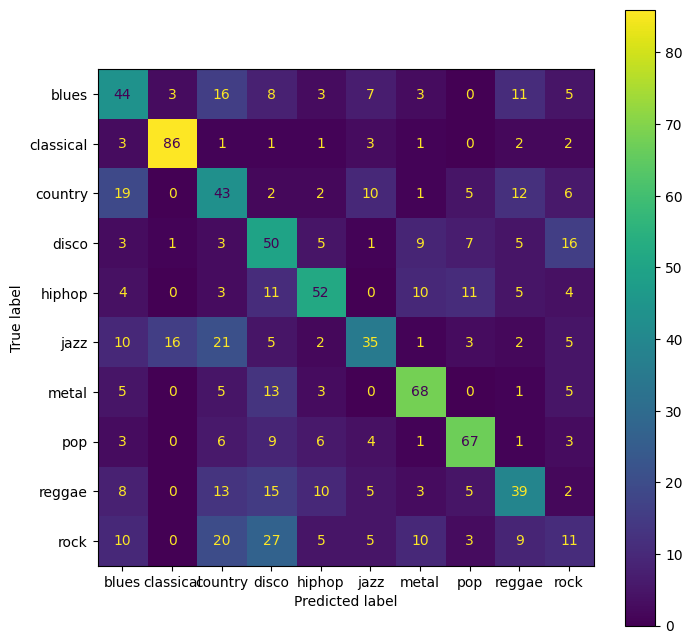

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)

conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_true))
conf_mat_disp.plot()

plt.gcf().set_size_inches(8, 8)

# seaborn turns on grid by default ... looks best without it
plt.grid(False)